<a href="https://colab.research.google.com/github/kalyankalluri999/Disseration/blob/main/Updated_Disseration_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart_disease = pd.read_csv('Heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print("The heart disease data has {} data points".format(heart_disease.shape[0]))
print("The heart disease data has {} features".format(heart_disease.shape[1]))

The heart disease data has 303 data points
The heart disease data has 14 features


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

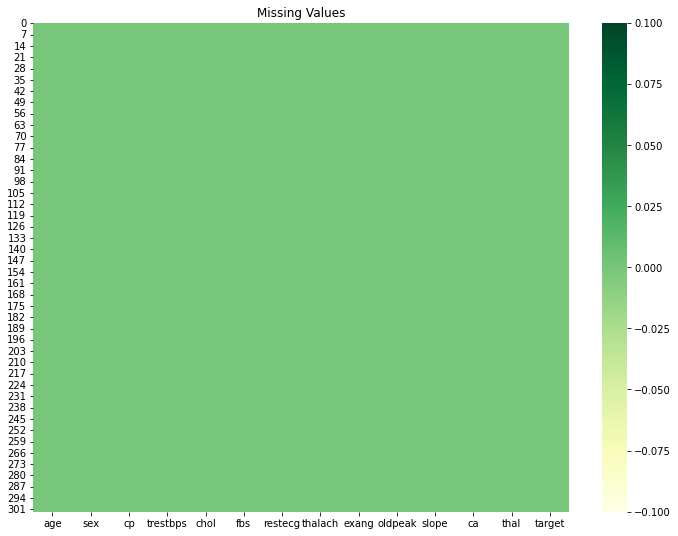

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) 
sns.heatmap(heart_disease.isna(), cmap='YlGn')
plt.title("Missing Values") 
plt.show()

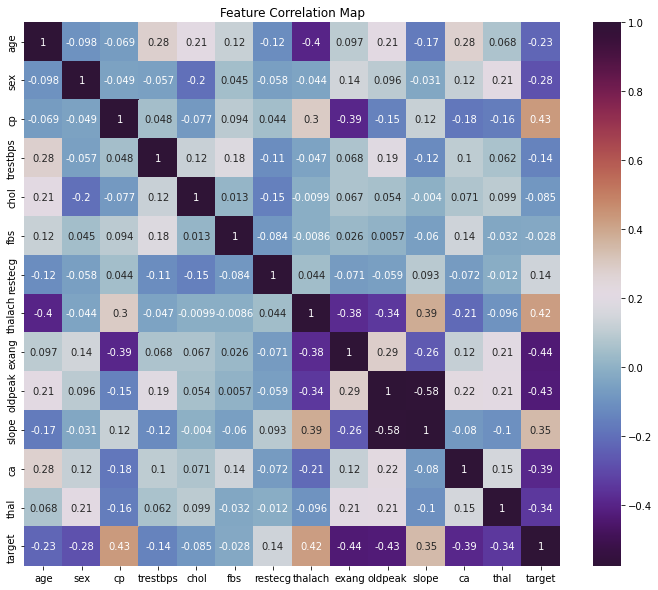

In [8]:
heart_disease['target'] = np.where(heart_disease['target']==True, 1, 0)
plt.figure(figsize=(12,10))
sns.heatmap(heart_disease.corr(), annot=True, cmap='twilight_shifted')
plt.title("Feature Correlation Map")
plt.show()

In [9]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The Target Column has two outcomes **1** and **0**

Where 

**1 - Repersents Defective Heart**

**0 -  Healthy Heart**


**Data Pre-Processing**

In [10]:
M = heart_disease.drop(columns='target', axis=1)
n = heart_disease['target']

In [11]:
M.shape

(303, 13)

In [12]:
n.shape

(303,)

In [13]:
# Using sklearn library we are importing the train_test_split module which can help to split data equally in to train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(M, n, test_size=0.30, random_state=0)

**Model Implementation**

**Logistic Regression**

In [14]:
# Using sklearn library have imported logistic  regression alogorithm 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

LR_al = LogisticRegression()

# training the LogisticRegression model with Training data

LR_al.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [15]:
# accuracy on training data
LR_Pred = LR_al.predict(x_train)
training_data_accuracy = accuracy_score(LR_Pred, y_train)
print('Accuracy on the Training data is : ', training_data_accuracy)

Accuracy on the Training data is :  0.8679245283018868


In [16]:
# accuracy on test data
LR_test_prediction = LR_al.predict(x_test)
test_data_accuracy = accuracy_score(LR_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8351648351648352


In [17]:
#using sklearn library we are importing perfomance metrics like "accuracy", "precision", "F1", "Recall" and "Confusion matrix"

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, LR_al.predict(x_train)))

logistic_regression_accuracy = accuracy_score(y_test, LR_al.predict(x_test))

print(logistic_regression_accuracy)

0.8679245283018868
0.8351648351648352


In [18]:
# confusion matrix
print(confusion_matrix(y_test, LR_test_prediction))

[[33 11]
 [ 4 43]]


In [19]:
# classification report
print(classification_report(y_test, LR_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



**SVM**

In [20]:
accu = {}

from sklearn.svm import SVC

SVC_AL = SVC(probability=True)

SVC_AL.fit(x_train, y_train)

y_predict = SVC_AL.predict(x_test)

acc_svc = accuracy_score(y_test,y_predict)

accu['SVM']=acc_svc*100

print("The Training accuracy of the SVC model is:",accuracy_score(y_train, SVC_AL.predict(x_train))*100,"%")

print("The Testing accuracy of the SVC model is:",accuracy_score(y_test,y_predict)*100,"%")

The Training accuracy of the SVC model is: 66.50943396226415 %
The Testing accuracy of the SVC model is: 67.03296703296702 %


In [21]:
print("Confusion matrix: ",confusion_matrix(y_test,y_predict))

print("Classification Report:",classification_report(y_test,y_predict))

Confusion matrix:  [[19 25]
 [ 5 42]]
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.43      0.56        44
           1       0.63      0.89      0.74        47

    accuracy                           0.67        91
   macro avg       0.71      0.66      0.65        91
weighted avg       0.71      0.67      0.65        91



**Random Forest**

In [22]:
accuracy = {}

from sklearn.ensemble import RandomForestClassifier

RF_AL = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)

RF_AL.fit(x_train, y_train)

RF_pred = RF_AL.predict(x_test)

acc_score =accuracy_score(y_test,RF_pred)

accuracy['RF']= acc_score*100

print(" The training accuracy score of the model is:",accuracy_score(y_train, RF_AL.predict(x_train))*100,"%")

print("The testing accuracy score of the model is:",accuracy_score(y_test,RF_pred)*100,"%")

 The training accuracy score of the model is: 97.16981132075472 %
The testing accuracy score of the model is: 83.51648351648352 %


In [23]:
print("Confusion matrix:",confusion_matrix(y_test,RF_pred))

print("Classification Report",classification_report(y_test,RF_pred))

Confusion matrix: [[33 11]
 [ 4 43]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



**GBC**

In [24]:
accuracy = {}

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)

GBC.fit(x_train, y_train)

y_gbc_predict = GBC.predict(x_test)

ac = accuracy_score(y_test,y_gbc_predict)

accuracy = {}['GradientBoosting']=ac*100

print("Training accuracy score of the model is:",accuracy_score(y_train, GBC.predict(x_train))*100,"%")

print("Testing accuracy score of the model is:",accuracy_score(y_test,y_gbc_predict)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 79.12087912087912 %


In [25]:
print("Confusion matrix:",confusion_matrix(y_test,y_gbc_predict))

print("Classification Report",classification_report(y_test,y_gbc_predict))

Confusion matrix: [[31 13]
 [ 6 41]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.70      0.77        44
           1       0.76      0.87      0.81        47

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



**XGBOOST**

In [26]:
from xgboost import XGBClassifier 

XGB = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

XGB.fit(x_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=180)

In [27]:
accuracy = {}

XGB_pred = XGB.predict(x_test)

ACC =accuracy_score(y_test,XGB_pred)

accuracy['XGBoost']= ACC*100

print("Training accuracy score:",accuracy_score(y_train, XGB.predict(x_train))*100,"%")

print("Testing accuracy score:",accuracy_score(y_test,XGB_pred)*100,"%")

Training accuracy score: 97.16981132075472 %
Testing accuracy score: 80.21978021978022 %


In [28]:
print("Confusion matrix:",confusion_matrix(y_test,XGB_pred))

print("Classification Report",classification_report(y_test,XGB_pred))

Confusion matrix: [[32 12]
 [ 6 41]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



**KNN**

In [29]:
accuracy = {}

from sklearn.neighbors import KNeighborsClassifier

KNN_AL =KNeighborsClassifier(n_neighbors=8)

KNN_AL.fit(x_train,y_train)

KNN_pred = KNN_AL.predict(x_test)

ACC=accuracy_score(y_test,KNN_pred)

accuracy['KNN']=ACC*100

print("Training accuracy score of the model is:",accuracy_score(y_train, KNN_AL.predict(x_train))*100,"%")

print("Testing accuracy score of the model is:",accuracy_score(y_test,KNN_pred)*100,"%")

Training accuracy score of the model is: 72.16981132075472 %
Testing accuracy score of the model is: 70.32967032967034 %


In [30]:
print("Confusion matrix of the model",confusion_matrix(y_test,KNN_pred))

print("Classification Report",classification_report(y_test,KNN_pred))

Confusion matrix of the model [[31 13]
 [14 33]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.70      0.70        44
           1       0.72      0.70      0.71        47

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



**Decision Tree**

In [31]:
accuracy = {}

from sklearn.tree import DecisionTreeClassifier

DT_AL = DecisionTreeClassifier()

DT_AL.fit(x_train, y_train)

y_dt = DT_AL.predict(x_test)

ACCU =accuracy_score(y_test,y_dt)

accuracy['DT']=ACCU*100

print("Training accuracy :",accuracy_score(y_train, DT_AL.predict(x_train))*100,"%")

print("Testing accuracy :",accuracy_score(y_test,y_dt)*100,"%")

Training accuracy : 100.0 %
Testing accuracy : 71.42857142857143 %


In [32]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_dt))

print("Classification Report",classification_report(y_test,y_dt))

Confusion matrix of the model [[32 12]
 [14 33]]
Classification Report               precision    recall  f1-score   support

           0       0.70      0.73      0.71        44
           1       0.73      0.70      0.72        47

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [33]:
from sklearn.model_selection import GridSearchCV
gd_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

gd_search = GridSearchCV(DT_AL, gd_param, cv = 10, n_jobs = -1, verbose = 1)
gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [34]:
gd_search.best_score_

0.8497835497835498

In [35]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [36]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [37]:
accuracy = {}

y_pred = DT.predict(x_test)
acc4 = accuracy_score(y_test,y_pred)
accuracy['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, DT.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 99.52830188679245 %
Testing accuracy score of the model is: 71.42857142857143 %


In [38]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[33 11]
 [15 32]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.75      0.72        44
           1       0.74      0.68      0.71        47

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



In [39]:
import pickle
filename = 'heart_disease.sav'
pickle.dump(LR_al, open(filename, 'wb'))

In [40]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease.sav', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<function matplotlib.pyplot.show(*args, **kw)>

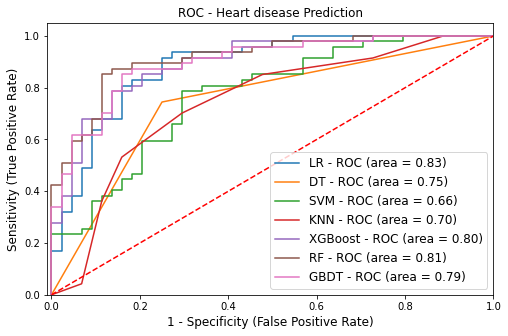

In [43]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': LR_al,
},
{
    'label': 'DT',
    'model': DT_AL,
},
{
    'label': 'SVM',
    'model': SVC_AL,
},
{
    'label': 'KNN',
    'model': KNN_AL,
},
{
    'label': 'XGBoost',
    'model': XGB,
},
{
    'label': 'RF',
    'model': RF_AL,
},
{
    'label': 'GBDT',
    'model': GBC,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[86.79, 71.43, 67.03, 70.33, 70.33, 83.52000000000001, 79.12]
[83.24000000000001, 73.6, 66.27, 70.33, 79.97999999999999, 81.04, 78.84]


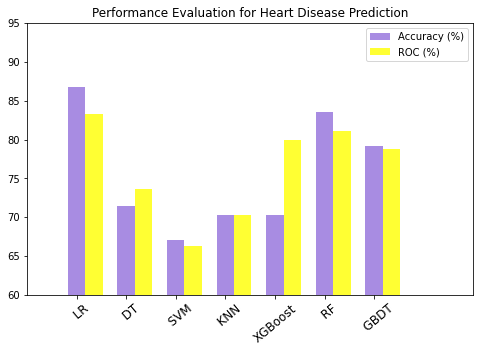

In [45]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': LR_al,
},
{
    'label': 'DT',
    'model': DT_AL,
},
{
    'label': 'SVM',
    'model': SVC_AL,
},
{
    'label': 'KNN',
    'model': KNN_AL,
},
{
    'label': 'XGBoost',
    'model': XGB,
},
{
    'label': 'RF',
    'model': RF_AL,
},
{
    'label': 'GBDT',
    'model': GBC,
 }
]


means_roc = []

means_accuracy = [100*round(training_data_accuracy,4), 100*round(acc4,4), 100*round(acc_svc,4), 100*round(ACC,4), 100*round(ACC,4), 
                  100*round(acc_score,4), 100*round(ac,4)]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='YELLOW',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])
plt.title('Performance Evaluation for Heart Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()